In [1]:
# Importing libraries

import pandas as pd
import numpy as np

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
data = pd.read_csv('data/Walmart_Store_sales.csv')
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092


In [3]:
df = data.copy()

### Data Exploration

In [4]:
print('the shape of the dataset is :', data.shape)
print()
print('Types of variables :\n', df.dtypes)
print()
print('Key numbers : \n', df.describe().apply(lambda s: s.apply('{0:.5f}'.format)))

the shape of the dataset is : (150, 8)

Types of variables :
 Store           float64
Date             object
Weekly_Sales    float64
Holiday_Flag    float64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

Key numbers : 
            Store   Weekly_Sales Holiday_Flag Temperature Fuel_Price  \
count  150.00000      136.00000    138.00000   132.00000  136.00000   
mean     9.86667  1249535.82794      0.07971    61.39811    3.32085   
std      6.23119   647463.04235      0.27183    18.37890    0.47815   
min      1.00000   268929.03000      0.00000    18.79000    2.51400   
25%      4.00000   605075.71750      0.00000    45.58750    2.85225   
50%      9.00000  1261423.86500      0.00000    62.98500    3.45100   
75%     15.75000  1806386.20000      0.00000    76.34500    3.70625   
max     20.00000  2771397.17000      1.00000    91.65000    4.19300   

             CPI Unemployment  
count  138.00000    135.00000  
mean   179.

In [5]:
from datetime import datetime 

# Convert Date column into datetime format
df['Date'] = pd.to_datetime(df['Date'], format = "%d-%m-%Y")
df.dtypes

Store                  float64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag           float64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [6]:
df["day"] = df['Date'].dt.day
df["month"] = df['Date'].dt.month
df["year"] = df['Date'].dt.year

df = df.drop(df.columns[1], axis=1)
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
0,6.0,1572117.54,NaN,59.61,3.045,214.777523,6.858,18.0,2.0,2011.0
1,13.0,1807545.43,0.0,42.38,3.435,128.616064,7.470,25.0,3.0,2011.0
2,17.0,NaN,0.0,NaN,NaN,130.719581,5.936,27.0,7.0,2012.0
3,11.0,1244390.03,0.0,84.57,NaN,214.556497,7.346,NaN,NaN,NaN
4,6.0,1644470.66,0.0,78.89,2.759,212.412888,7.092,28.0,5.0,2010.0


In [7]:
df.columns = df.columns.str.lower()
df.head()

,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,day,month,year
0,6.0,1572117.54,NaN,59.61,3.045,214.777523,6.858,18.0,2.0,2011.0
1,13.0,1807545.43,0.0,42.38,3.435,128.616064,7.470,25.0,3.0,2011.0
2,17.0,NaN,0.0,NaN,NaN,130.719581,5.936,27.0,7.0,2012.0
3,11.0,1244390.03,0.0,84.57,NaN,214.556497,7.346,NaN,NaN,NaN
4,6.0,1644470.66,0.0,78.89,2.759,212.412888,7.092,28.0,5.0,2010.0


In [8]:
df.isna().sum()

store            0
weekly_sales    14
holiday_flag    12
temperature     18
fuel_price      14
cpi             12
unemployment    15
day             18
month           18
year            18
dtype: int64

In [9]:
df.dropna(subset=['weekly_sales'], inplace=True)

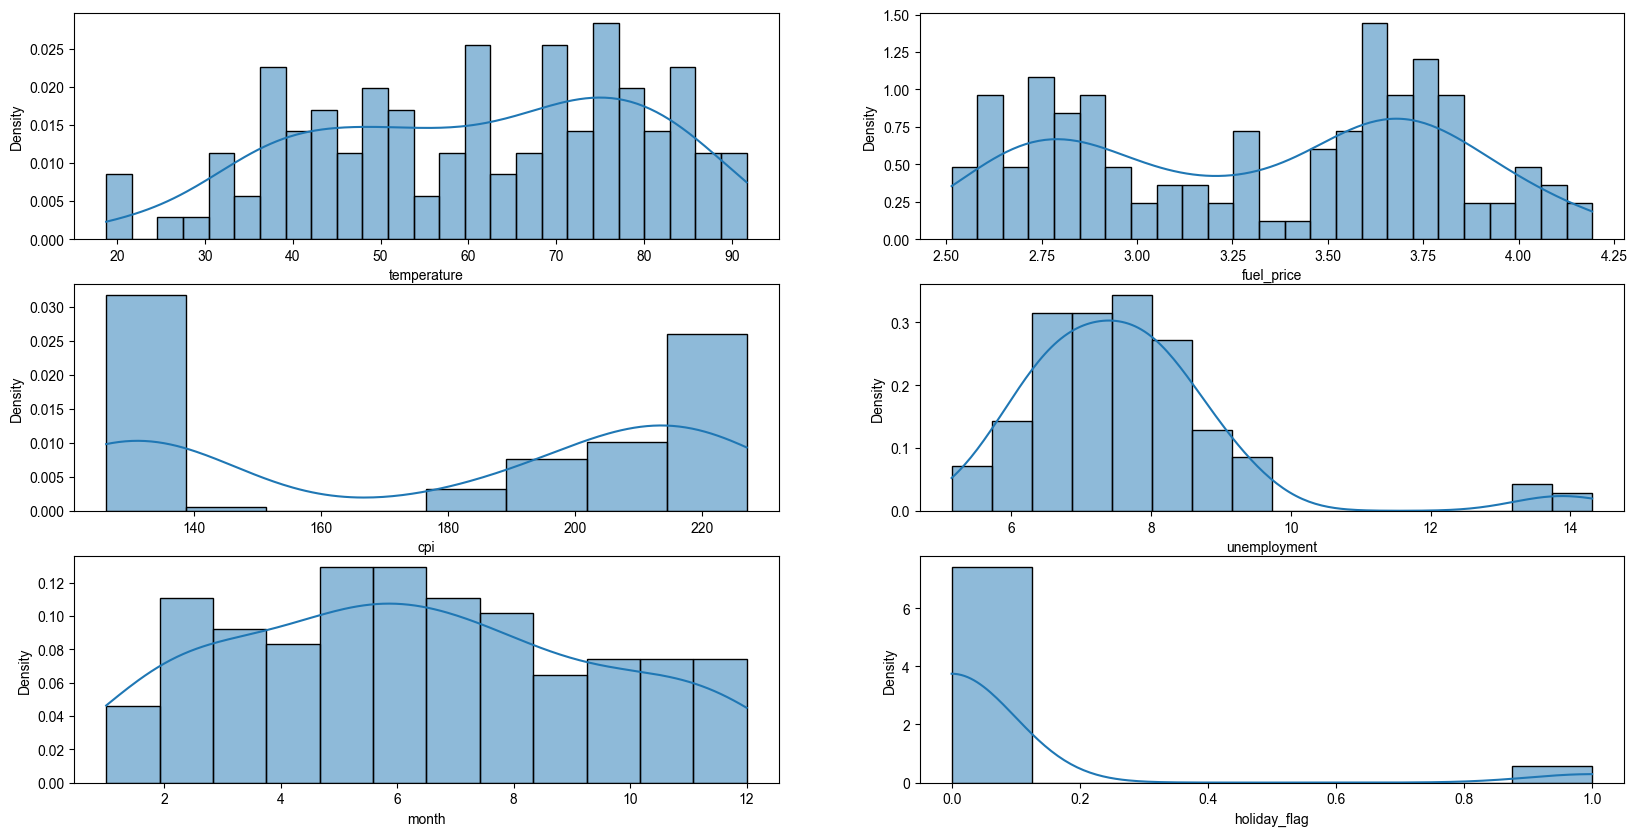

In [10]:
fig, axes = plt.subplots(3,2, figsize=(20,10))


sns.histplot(data=df, x='temperature', bins=25, kde=True, stat='density', ax=axes[0,0])
sns.histplot(data=df, x='fuel_price', bins=25, kde=True, stat='density', ax=axes[0,1])
sns.histplot(data=df, x='cpi', kde=True, stat='density', ax=axes[1,0])
sns.histplot(data=df, x='unemployment', kde=True, stat='density', ax=axes[1,1])
sns.histplot(data=df, x='month', bins=12, kde=True, stat='density', ax=axes[2,0])
sns.histplot(data=df, x='holiday_flag', kde=True, stat='density', ax=axes[2,1])
sns.set()

plt.show()

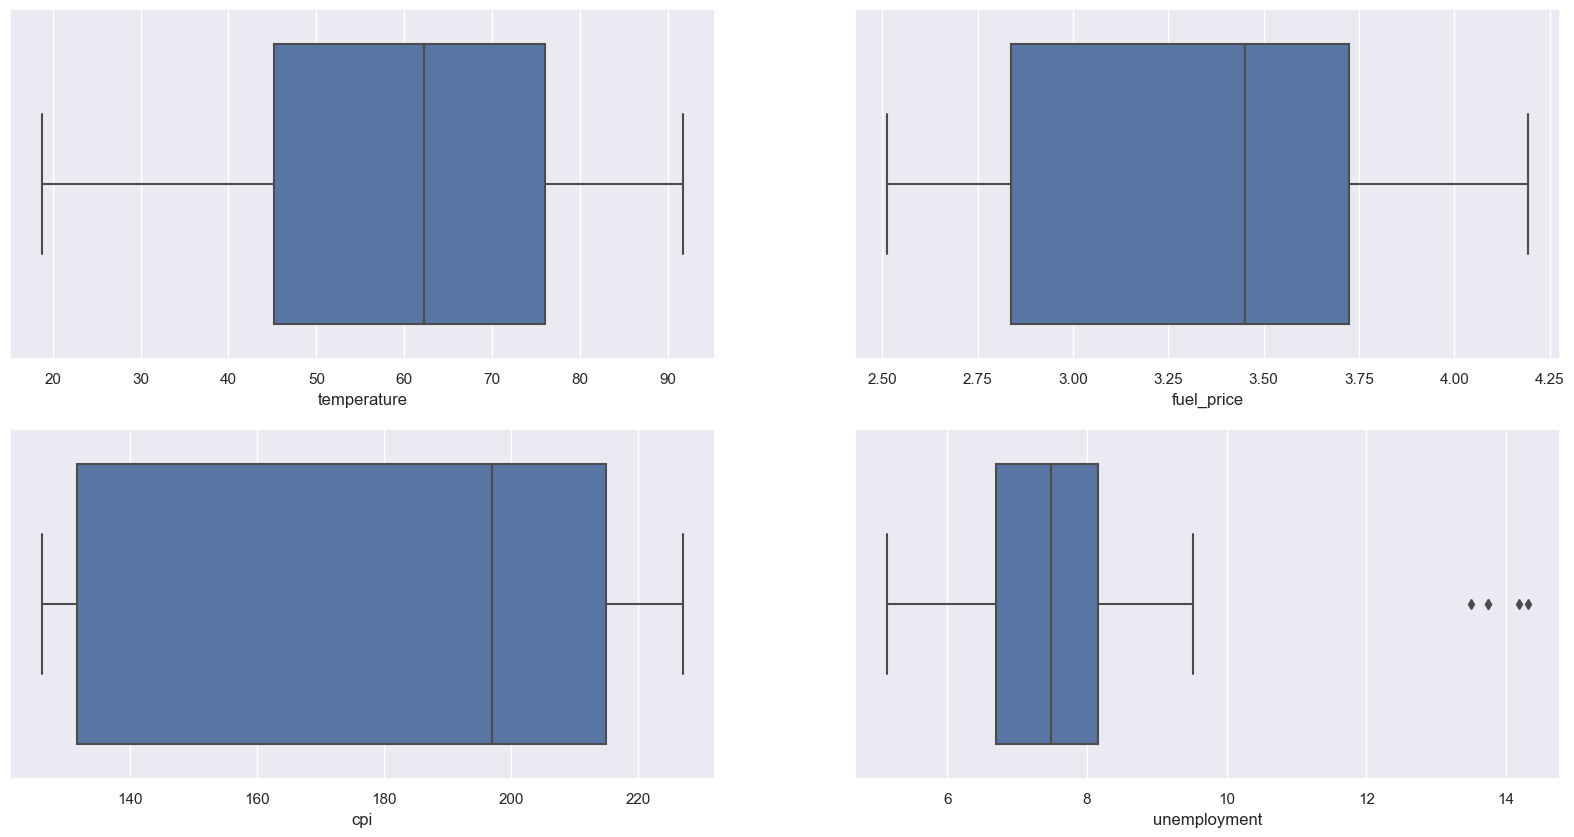

In [11]:
fig, axes = plt.subplots(2,2, figsize=(20,10))


sns.boxplot(data=df, x='temperature', ax=axes[0,0])
sns.boxplot(data=df, x='fuel_price', ax=axes[0,1])
sns.boxplot(data=df, x='cpi', ax=axes[1,0])
sns.boxplot(data=df, x='unemployment', ax=axes[1,1])
sns.set()

plt.show()

We have some outliers in the unemployment column

Let's check the target variable !

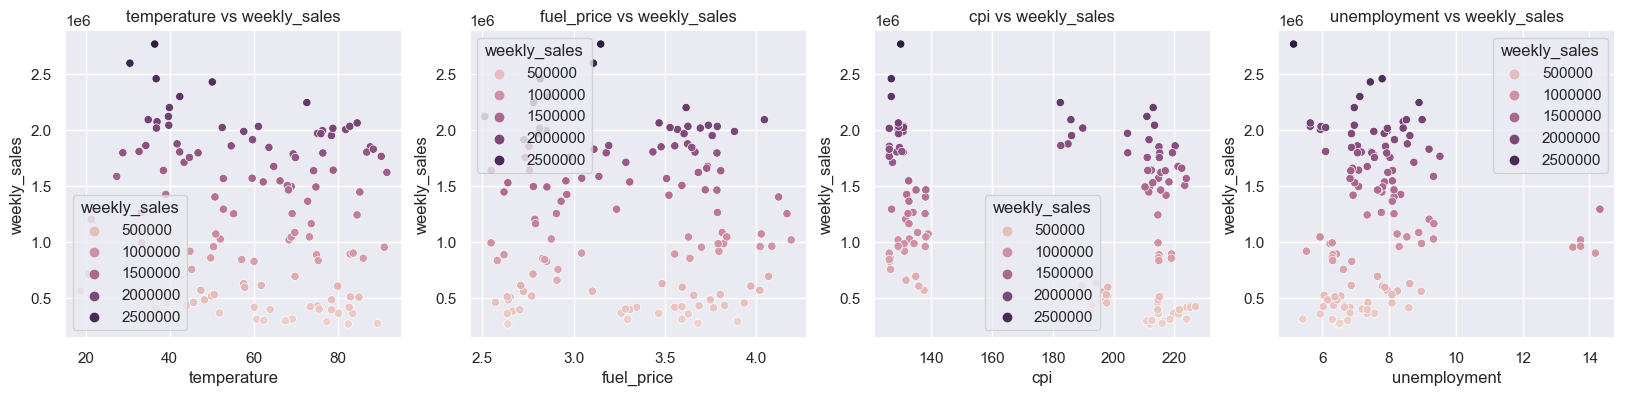

In [12]:
fig , ax = plt.subplots(1,4,figsize=(20,4))
columns = ['temperature','fuel_price','cpi','unemployment']
for i,col in enumerate(columns):
    sns.scatterplot(df,
                 y='weekly_sales',x=col,
                 ax=ax[i],
                 hue='weekly_sales'
                )
    ax[i].set_title(f'{col} vs weekly_sales')
plt.show()  

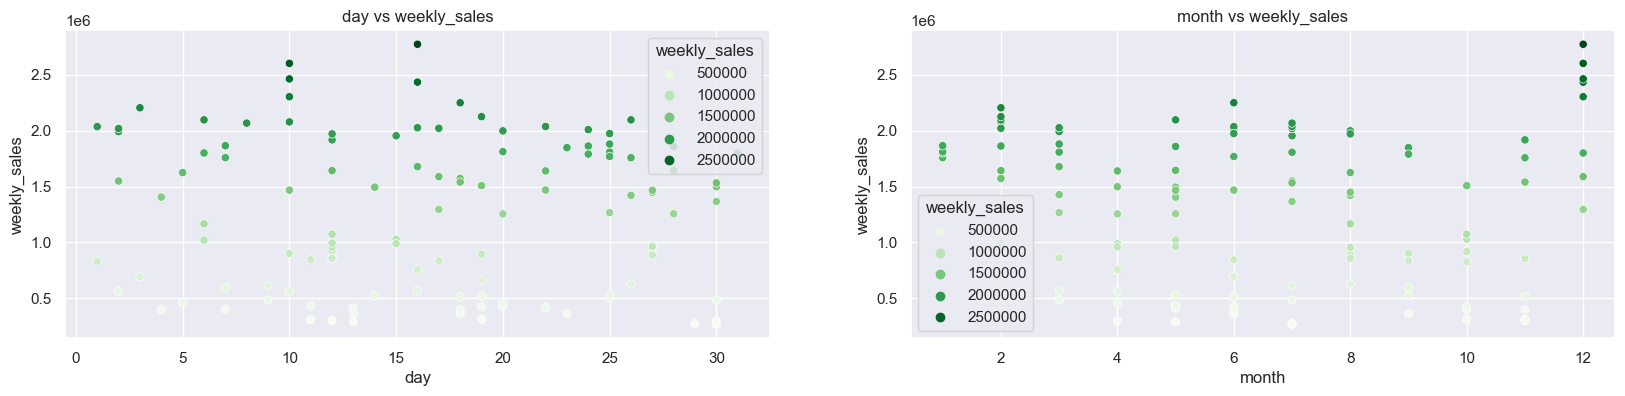

In [13]:
fig , ax = plt.subplots(1,2,figsize=(20,4))
columns = ['day','month']
for i,col in enumerate(columns):
    sns.scatterplot(df,
                 y='weekly_sales',x=col,
                 ax=ax[i],
                 hue='weekly_sales',
                 palette='Greens'
                )
    ax[i].set_title(f'{col} vs weekly_sales')
plt.show()  

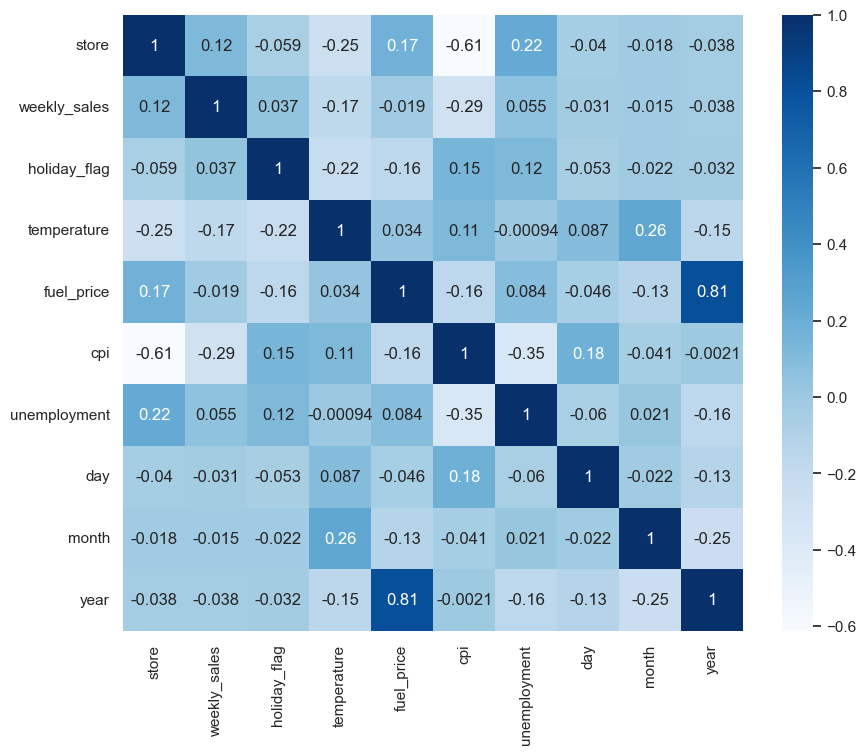

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),cmap='Blues',annot=True);

In [15]:
Q1 = df['unemployment'].quantile(0.25)
Q3 = df['unemployment'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

#Filtrate the outliers
upper_rows = np.where(df['unemployment']>=upper)[0]
lower_rows = np.where(df['unemployment']<=lower)[0]

# Removing the outliers
df.drop(index=upper_rows, inplace=True)
df.drop(index=lower_rows, inplace=True)

In [16]:
# Imputing missing values for date columns
cols = ['day', 'month', 'year']

# Replacing missing values by the most frequent value 
for col in cols:
    most_frequent_value = df[col].mode()[0]
    df[col].fillna(most_frequent_value, inplace=True)

In [17]:
# Separating target from features (baseline)
print('Separating target from the first feature : ')
target = 'weekly_sales'

X = df.drop(target, axis=1)
y = df.loc[:, target]

print('X:')
print(X.head())
print()
print('Y:')
print(y.head())

Separating target from the first feature : 
X:
   store  holiday_flag  temperature  fuel_price         cpi  unemployment  \
0    6.0           NaN        59.61       3.045  214.777523         6.858   
1   13.0           0.0        42.38       3.435  128.616064         7.470   
3   11.0           0.0        84.57         NaN  214.556497         7.346   
4    6.0           0.0        78.89       2.759  212.412888         7.092   
5    4.0           0.0          NaN       2.756  126.160226         7.896   

    day  month    year  
0  18.0    2.0  2011.0  
1  25.0    3.0  2011.0  
3  12.0    5.0  2010.0  
4  28.0    5.0  2010.0  
5  28.0    5.0  2010.0  

Y:
0    1572117.54
1    1807545.43
3    1244390.03
4    1644470.66
5    1857533.70
Name: weekly_sales, dtype: float64


In [18]:
from sklearn.model_selection import train_test_split

#Splitting dataset in training set and testing set
print('Splitting dataset in training and testing set...')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

print('...Done')

Splitting dataset in training and testing set...
...Done


### PREPROCESSING

In [19]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#Preprocessing on training set
print('preprocess the training set ...')

numeric_features = [2,3,4,5,6,7,8]
categorical_features = [0,1]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train = preprocessor.fit_transform(X_train)
print('...Done')
print('Preprocessing for training:')
print(X_train[0:5,:])
X_test = preprocessor.transform(X_test)
print()
print('Preprocessing for testing')
print(X_test[0:5:,])

preprocess the training set ...
...Done
Preprocessing for training:
  (0, 0)	0.9387558779041437
  (0, 1)	0.13919404986892675
  (0, 2)	-0.6849941997310195
  (0, 3)	-1.557862360630526
  (0, 4)	-0.7111111111111111
  (0, 5)	0.375
  (0, 9)	1.0
  (1, 0)	0.062161802958096854
  (1, 1)	-0.04533317076144525
  (1, 2)	0.3872442283699828
  (1, 3)	0.15071126489811584
  (1, 4)	0.17777777777777778
  (1, 5)	1.375
  (2, 0)	-1.5434885796198903
  (2, 1)	-0.6413217094433936
  (2, 2)	-0.6559296053665433
  (2, 3)	1.1780084582852746
  (2, 4)	-0.35555555555555557
  (2, 5)	-0.125
  (2, 6)	-1.0
  (2, 23)	1.0
  (3, 0)	0.3317321384495626
  (3, 1)	-0.5060781564347978
  (3, 2)	-0.6467119235858845
  (3, 3)	0.015851275150582756
  (3, 4)	1.0666666666666667
  (3, 5)	-0.125
  (3, 6)	-1.0
  (3, 23)	1.0
  (4, 0)	0.0668704551064193
  (4, 2)	0.319136163471798
  (4, 3)	-0.6935793925413302
  (4, 4)	-0.35555555555555557
  (4, 5)	1.375
  (4, 6)	-1.0
  (4, 10)	1.0

Preprocessing for testing
  (0, 0)	-0.021416772674628378
  (0, 1)

### MODEL TRAINING (Linear Regression : model1)

In [20]:
from sklearn.linear_model import LinearRegression

# Linear Regression to test the baseline
model1 = LinearRegression()
model1.fit(X_train, y_train)

# Predictions
y_pred = model1.predict(X_test)
print(f"Score on train set: {model1.score(X_train, y_train)}")
print(f"Score on test set: {model1.score(X_test, y_test)}")

Score on train set: 0.9743708172984382
Score on test set: 0.9428103982970563


In [21]:
# Obtenir les coefficients du modèle
coefficients = model1.coef_

# Afficher les coefficients associés à chaque variable
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef}")

store: -43818.832089191645
holiday_flag: -70446.29864118277
temperature: 143765.33088937396
fuel_price: -83462.72059454801
cpi: -47696.467340284515
unemployment: 72321.03631597612
day: -12463.820070430082
month: 419684.373991662
year: -1223627.7614282835


All features seems important.

Now let's check the learning curve and see if we overfit or not.

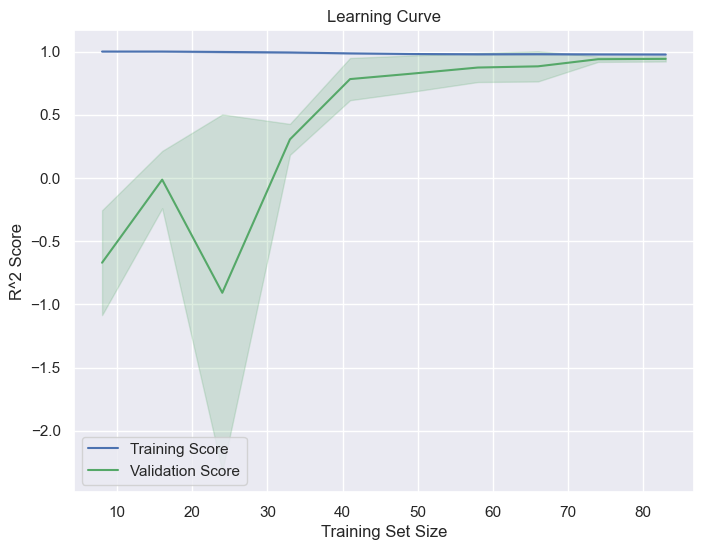

In [22]:
from sklearn.model_selection import learning_curve

# Créer une fonction pour afficher la courbe d'apprentissage
def plot_learning_curve(model, X, y):
    
    # Set learning curve model
    train_sizes, train_scores, val_scores = learning_curve(model, X, y, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    # Plot learning curve
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training Score', color='b')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='b')
    plt.plot(train_sizes, val_scores_mean, label='Validation Score', color='g')
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='g')
    plt.xlabel('Training Set Size')
    plt.ylabel('R^2 Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.show()

# Utiliser la fonction pour afficher la courbe d'apprentissage pour le modèle
plot_learning_curve(model1, X_train, y_train)

If we look at the learning curve we can see that more the model have data more it performs but we have some overfitting at the begining.

Let's see if regularization can help the model to have better result and fight the overfitting

### RIDGE MODEL (model1r)

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

model1r = Ridge()
%time
# Définition des hyperparamètres
params = {
    'alpha': np.logspace(-3, 3, 50)
}

# Configuration de la GridSearch
gridsearchRidge = GridSearchCV(model1r, param_grid = params, scoring='r2', n_jobs=-1, verbose=2, cv = 10) # cv : the number of folds to be used for CV
gridsearchRidge.fit(X_train, y_train)

# Meilleurs paramètres 
print("Best hyperparameters : ", gridsearchRidge.best_params_)
print("Best validation R2 score : ", gridsearchRidge.best_score_)

# Scores
print("R2 on training set : ", gridsearchRidge.score(X_train, y_train))
print("R2 on test set : ", gridsearchRidge.score(X_test, y_test))

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 5.01 µs
Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................alpha=0.00132571136559

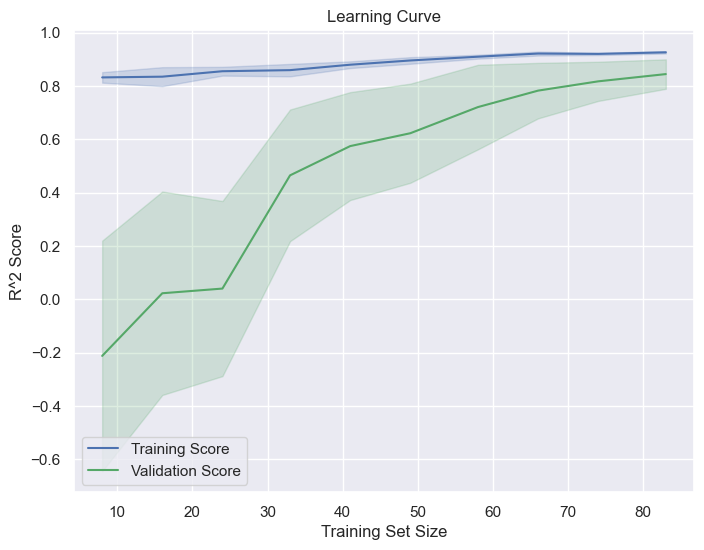

In [28]:
# Utiliser la fonction pour afficher la courbe d'apprentissage pour le modèle
plot_learning_curve(model1r, X_train, y_train)

Ridge provided better result than simple Linear Regression, we see on the learning curve that the train curve and the validation curve gradually increases together as the data increases too.

Of course it would be possible to try other models to improve further.